In [1]:
# Import our libs etc

import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt


# Import the files from data directory
train_transaction, test_transaction = pd.read_csv('data/train_transaction.csv'), pd.read_csv('data/test_transaction.csv')
train_identity, test_identity = pd.read_csv('data/train_identity.csv'), pd.read_csv('data/test_identity.csv')

In [2]:
# Let's take a look at what we have
train_transaction.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN   NaN  
2  NaN   NaN   NaN   NaN  
3  NaN   NaN   NaN   NaN  
4  0.0   0.0   0.0   0.0  

[5 rows x 394 columns]

In [3]:
test_transaction.head()

TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        3663549       18403224           31.95         W  10409  111.0   
1        3663550       18403263           49.00         W   4272  111.0   
2        3663551       18403310          171.00         W   4476  574.0   
3        3663552       18403310          284.95         W  10989  360.0   
4        3663553       18403317           67.95         W  18018  452.0   

   card3       card4  card5  card6  ...  V330  V331  V332  V333 V334 V335  \
0  150.0        visa  226.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
1  150.0        visa  226.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
2  150.0        visa  226.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
3  150.0        visa  166.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
4  150.0  mastercard  117.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   

   V336  V337  V338  V339  
0   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN  
4   NaN   NaN   NaN   NaN  

[5 rows x 393 columns]

In [4]:
train_identity.head()

TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33           id_34  id_35  \
0    NaN  ...  samsung browser 6.2   32.0  2220x1080  match_status:2      T   
1    NaN  ...   mobile safari 11.0   32.0   1334x750  match_status:1      T   
2    0.0  ...          chrome 62.0    NaN        NaN             NaN      F   
3    NaN  ...          chrome 62.0    NaN        NaN             NaN      F   
4    0.0  ...          chrome 62.0   24.0   1280x800  match_status:2      T   

  id_36 id_37  id_38  DeviceType                     DeviceInfo  
0     F     T      T      mobile  SAMSUNG SM-G892A Build/NRD90M  
1     F     F      T      mobile                     iOS Device  
2     F     T      T     desktop                        Windows  
3     F     T      T     desktop                            NaN  
4     F     T      T     desktop                          MacOS  

[5 rows x 41 columns]

In [5]:
test_identity.head()

TransactionID  id-01     id-02  id-03  id-04  id-05  id-06  id-07  id-08  \
0        3663586  -45.0  280290.0    NaN    NaN    0.0    0.0    NaN    NaN   
1        3663588    0.0    3579.0    0.0    0.0    0.0    0.0    NaN    NaN   
2        3663597   -5.0  185210.0    NaN    NaN    1.0    0.0    NaN    NaN   
3        3663601  -45.0  252944.0    0.0    0.0    0.0    0.0    NaN    NaN   
4        3663602  -95.0  328680.0    NaN    NaN    7.0  -33.0    NaN    NaN   

   id-09  ...                    id-31  id-32     id-33           id-34  \
0    NaN  ...  chrome 67.0 for android    NaN       NaN             NaN   
1    0.0  ...  chrome 67.0 for android   24.0  1280x720  match_status:2   
2    NaN  ...       ie 11.0 for tablet    NaN       NaN             NaN   
3    0.0  ...  chrome 67.0 for android    NaN       NaN             NaN   
4    NaN  ...  chrome 67.0 for android    NaN       NaN             NaN   

   id-35 id-36 id-37  id-38  DeviceType                   DeviceInfo  
0      F     F     T      F      mobile  MYA-L13 Build/HUAWEIMYA-L13  
1      T     F     T      T      mobile         LGLS676 Build/MXB48T  
2      F     T     T      F     desktop                  Trident/7.0  
3      F     F     T      F      mobile  MYA-L13 Build/HUAWEIMYA-L13  
4      F     F     T      F      mobile         SM-G9650 Build/R16NW  

[5 rows x 41 columns]

In [6]:
# We notice that some of the columns for test and train identity are miss-named using - instead of _ so we will correct
test_identity.columns = [col.replace("-","_") for col in test_identity.columns]

In [7]:
# Now we will merge our transaction and identity files
train = train_transaction.merge(train_identity, on = ['TransactionID'], how = 'left')
test = test_transaction.merge(test_identity, on = ['TransactionID'], how = 'left')
print(train.shape)
print(test.shape)

(590540, 434)
(506691, 433)


In [8]:
## Free up some RAM

# First delete unused memory types
del train_identity, train_transaction, test_identity, test_transaction

In [9]:
# Most of our data is float64, this is messy
train.info(memory_usage='deep')
train['id_33'].memory_usage(deep=True) /  100000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 2.5 GB


260.82341

In [11]:
#https://www.mikulskibartosz.name/how-to-reduce-memory-usage-in-pandas/
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
                c_min = df[col].min()
                c_max = df[col].max()
                if str(col_type)[:3] == 'int':
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                        df[col] = df[col].astype(np.uint8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                        df[col] = df[col].astype(np.uint16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                        df[col] = df[col].astype(np.uint32)                    
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
                    elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                        df[col] = df[col].astype(np.uint64)
                elif str(col_type)[:5] == 'float':
                    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float16)
                    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

Memory usage of dataframe is 1959.88 MB
Memory usage after optimization is: 530.06 MB
Decreased by 73.0%
Memory usage of dataframe is 1677.73 MB
Memory usage after optimization is: 462.06 MB
Decreased by 72.5%


In [12]:
# For our EDA we will combine the two datasets
df = pd.concat((train,test))

# Setting theme for seaborn graphs
sns.set_theme(style="whitegrid")

# Let's work through the columns
list(df.columns)

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V

<AxesSubplot:xlabel='isFraud', ylabel='count'>

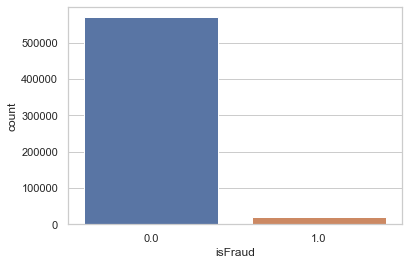

In [13]:
# isFraud
# Need to be careful of class imbalance
sns.countplot(x="isFraud", data=df)

<AxesSubplot:xlabel='TransactionDT', ylabel='Count'>

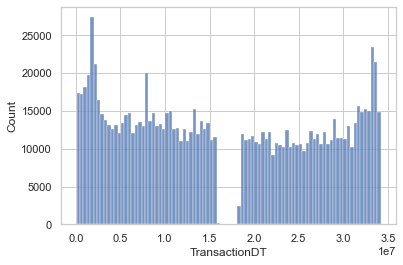

In [14]:
# Let's look at TransactionDT
# It increases but there is a gap in the middle - this is where the training data turns into test data
# We can also see spikes in activity - maybe christmas?
sns.histplot(df['TransactionDT'])

C:\Users\epicf\AppData\Local\Temp\ipykernel_2124\2999092798.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['day'] = (df['TransactionDT']//(60*60*24)-1)%7
C:\Users\epicf\AppData\Local\Temp\ipykernel_2124\2999092798.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['hour'] = (df['TransactionDT']//(60*60))%24


<AxesSubplot:xlabel='day', ylabel='pct_fraud'>

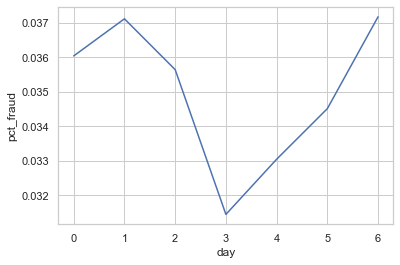

In [15]:
# Let's explore transactionDT and try to engineer some features
df['day'] = (df['TransactionDT']//(60*60*24)-1)%7
df['hour'] = (df['TransactionDT']//(60*60))%24

day_tmp = df[['isFraud','day']].groupby(by=['day']).mean().reset_index().rename(columns={'isFraud':'pct_fraud'})
hour_tmp = df[['isFraud','hour']].groupby(by=['hour']).mean().reset_index().rename(columns={'isFraud':'pct_fraud'})

# Slight differnce in fraud but seems marginal
# Keep but investiagte usage
sns.lineplot(x = day_tmp['day'], y = day_tmp['pct_fraud'])

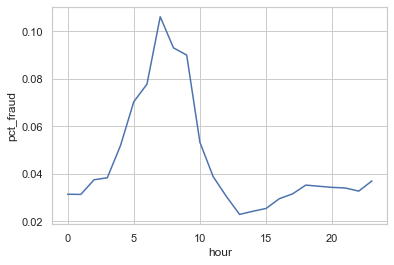

In [16]:
# For hour there is a clear and pronounced up tick in fraud around hour 5 to 10, perhaps this is when people are asleep
# Hour 5 and hour 10 don't mean 5am and 10am though, they could represent say 3pm and 7pm depending on when the data started 
# Might be at that time people are less likely to use card in first place
sns.lineplot(x = hour_tmp['hour'], y = hour_tmp['pct_fraud'])

del day_tmp
del hour_tmp
# Make sure dataframe not fragmented
df = df.copy()

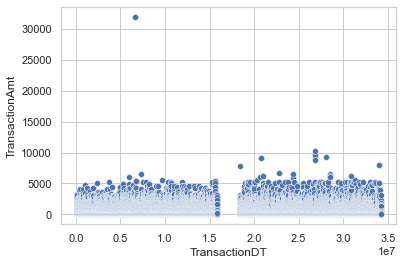

In [17]:
# Transaction Amount

# Let's plot and check for outliers etc

sns.scatterplot(y=df['TransactionAmt'], x=df['TransactionDT'])

# Looks good, but let's remove values above 15,000 for our traning set
df = df[df['TransactionAmt'] < 15000]

<AxesSubplot:xlabel='ProductCD', ylabel='count'>

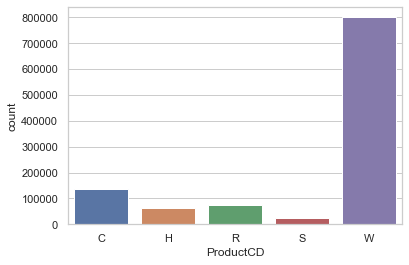

In [18]:
# ProductCD
sns.countplot(x = df['ProductCD'])


<AxesSubplot:ylabel='ProductCD'>

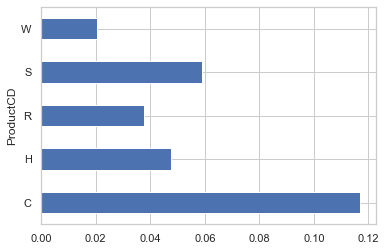

In [19]:
# This feature is probably helpful, notably C and S are high risk for fraud despite lower count of transactions
df.groupby('ProductCD')['isFraud'].mean().sort_index().plot(kind='barh')

In [20]:
# Moving onto our card columns which are:
card_cols = [col for col in df.columns if 'card' in col]
df[card_cols]

card1  card2  card3       card4  card5   card6
0       13926    NaN  150.0    discover  142.0  credit
1        2755  404.0  150.0  mastercard  102.0  credit
2        4663  490.0  150.0        visa  166.0   debit
3       18132  567.0  150.0  mastercard  117.0   debit
4        4497  514.0  150.0  mastercard  102.0  credit
...       ...    ...    ...         ...    ...     ...
506686  13832  375.0  185.0  mastercard  224.0   debit
506687   3154  408.0  185.0  mastercard  224.0   debit
506688  16661  490.0  150.0        visa  226.0   debit
506689  16621  516.0  150.0  mastercard  224.0   debit
506690   5713  168.0  144.0        visa  147.0  credit

[1097229 rows x 6 columns]

<AxesSubplot:xlabel='card1', ylabel='Count'>

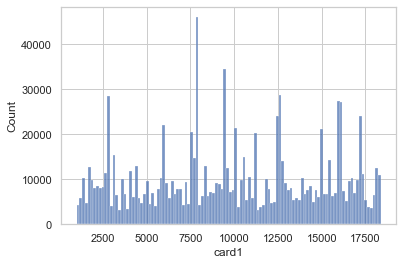

In [21]:
sns.histplot(df['card1'])

<AxesSubplot:xlabel='card2', ylabel='Count'>

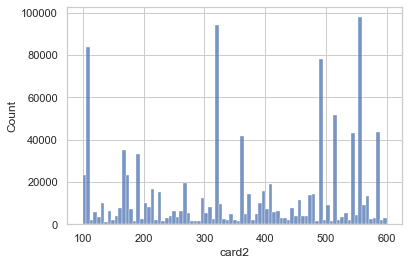

In [22]:
sns.histplot(df['card2'])

<AxesSubplot:xlabel='card3', ylabel='Count'>

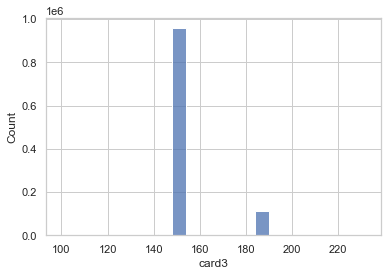

In [23]:
sns.histplot(df['card3'])

<AxesSubplot:xlabel='card4', ylabel='count'>

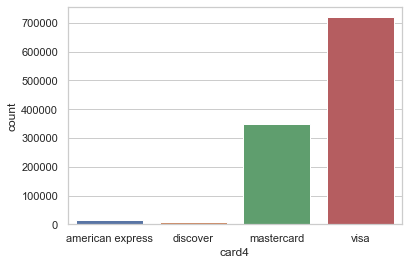

In [24]:
sns.countplot(x = df['card4'])

<AxesSubplot:xlabel='card5', ylabel='Count'>

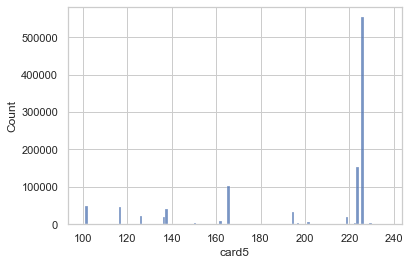

In [25]:
sns.histplot(df['card5'])

<AxesSubplot:xlabel='card6', ylabel='count'>

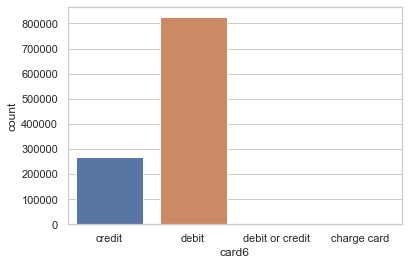

In [26]:
sns.countplot(x = df['card6'])

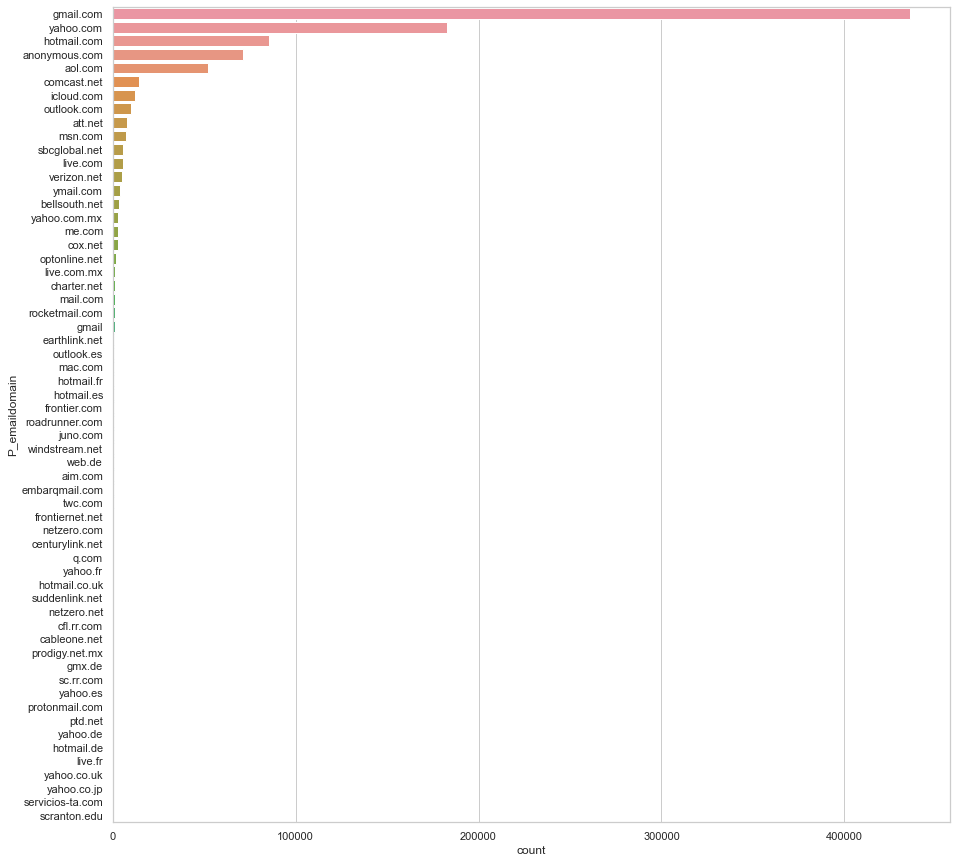

<AxesSubplot:xlabel='P_emaildomain'>

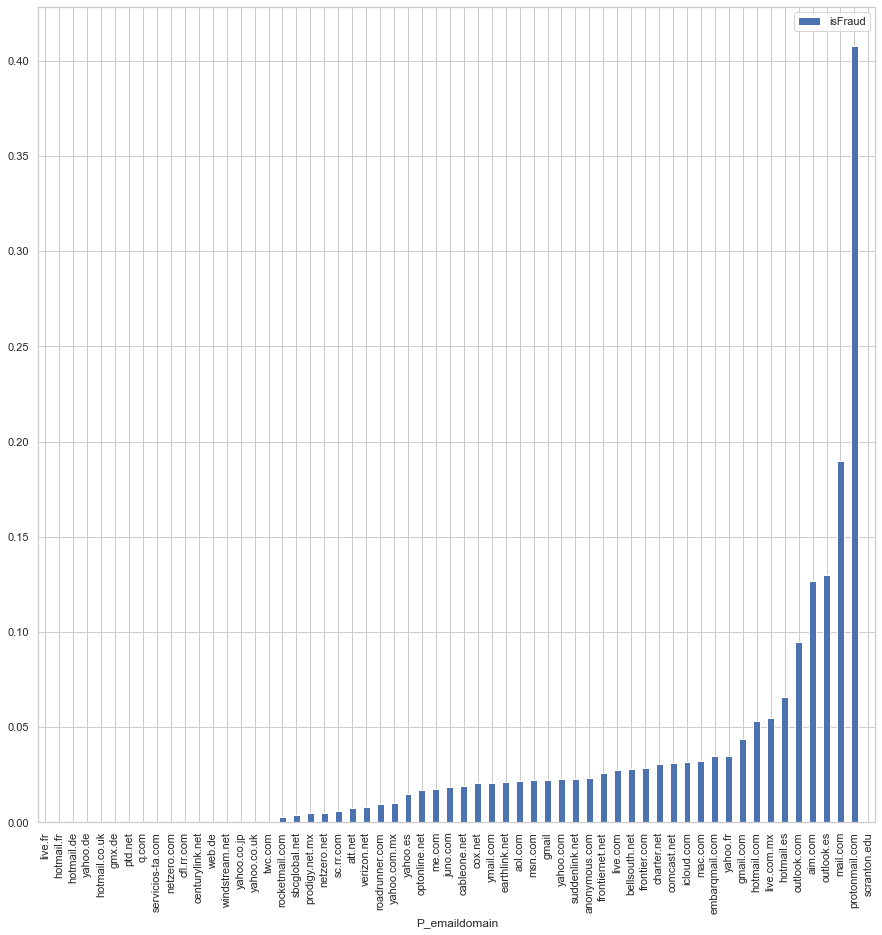

In [27]:
# Email domain for purchaser
f, a = plt.subplots(nrows=1, ncols=1,figsize=(15,15))
sns.countplot(y = df['P_emaildomain'], order = df['P_emaildomain'].value_counts().index)
plt.show()
df[['P_emaildomain','isFraud']].groupby(by=['P_emaildomain']).mean().sort_values(by=['isFraud']).plot(kind='bar', figsize=(15,15))

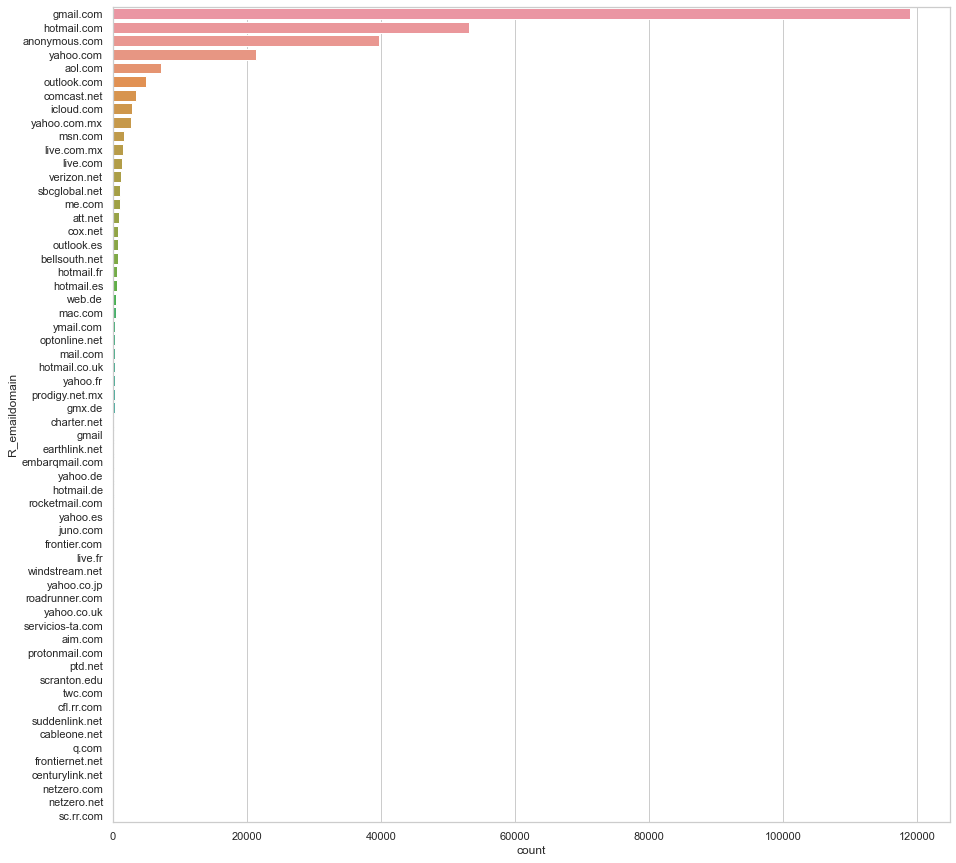

<AxesSubplot:xlabel='R_emaildomain'>

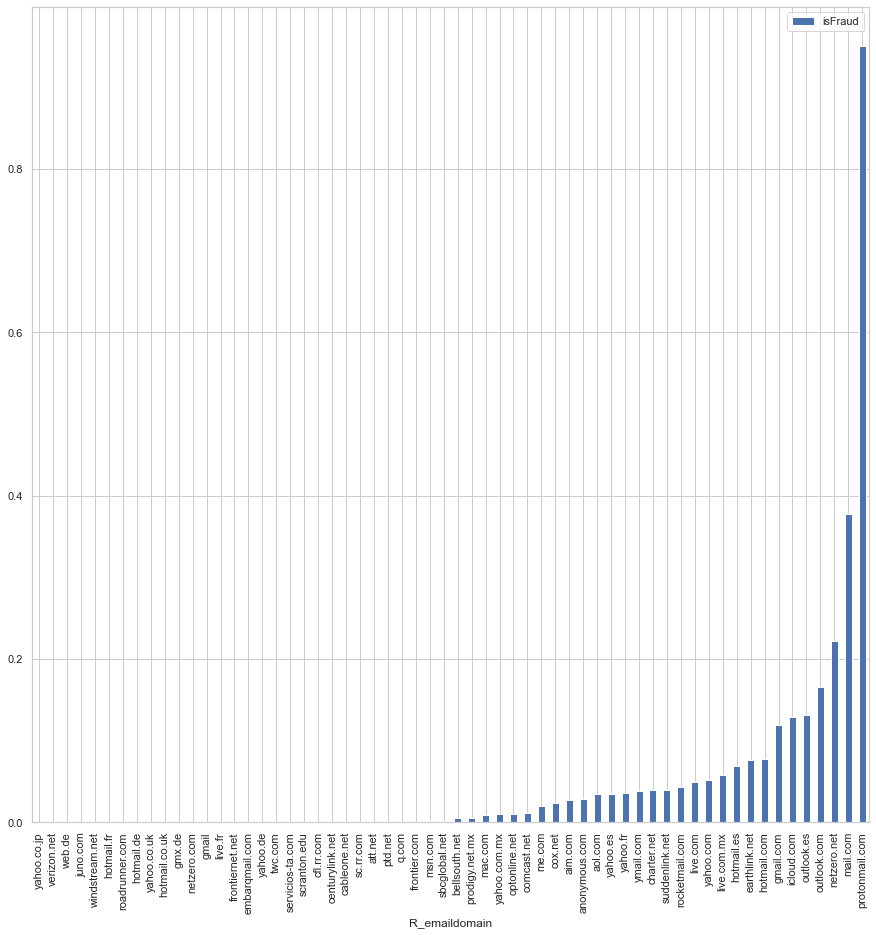

In [28]:
# Doing the same for recipent email
# Email domain for purchaser

# We notice that the number of transactions with a reciver email is much lower

f, a = plt.subplots(nrows=1, ncols=1,figsize=(15,15))
sns.countplot(y = df['R_emaildomain'], order = df['R_emaildomain'].value_counts().index)
plt.show()
df[['R_emaildomain','isFraud']].groupby(by=['R_emaildomain']).mean().sort_values(by=['isFraud']).plot(kind='bar', figsize=(15,15))

In [29]:
# Now let's move onto the V ciolumns

# They are highly redudant so we will remove the ones that are not useful
# We will group them such that they are with ones they are 75% or more correlated with and choose the column with most unique values

# Start by looking at num of NANs per column:
null_df = df.isna()
null_group = {}
filter_cols = [col for col in df if col.startswith("V")]
for col in filter_cols:
    group = null_df[col].sum()
    try:
        null_group[group].append(col)
    except:
        null_group[group] = [col]

del null_df

for key,value in null_group.items():
    print("--- Columns with ", key, " NaN values ---")
    print(value)

--- Columns with  455805  NaN values ---
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11']
--- Columns with  88662  NaN values ---
['V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34']
--- Columns with  245823  NaN values ---
['V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52']
--- Columns with  89995  NaN values ---
['V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74']
--- Columns with  101245  NaN values ---
['V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94']
--- Columns with  314  NaN values ---
['V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108

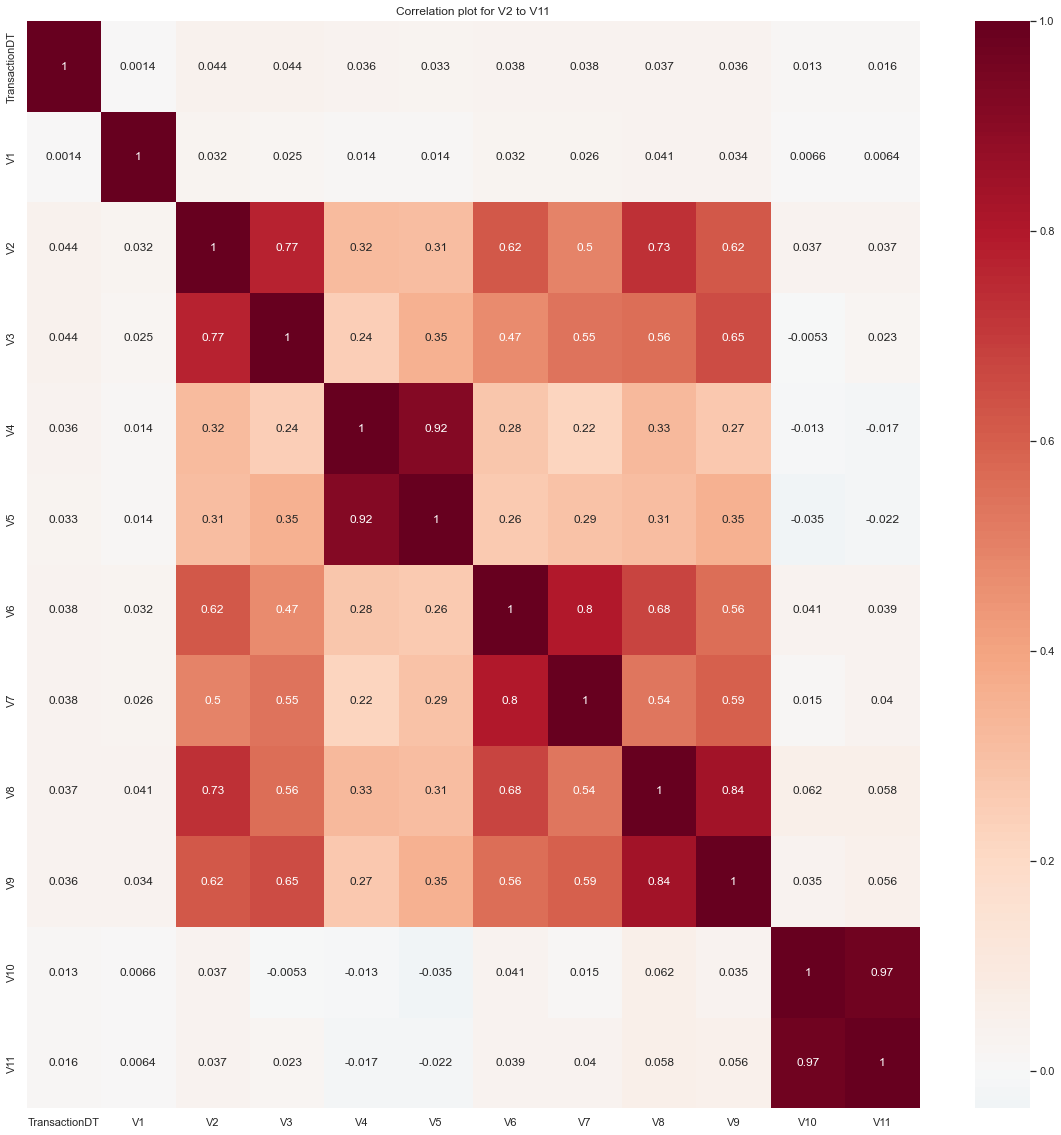

[['V3', 'V2'], ['V5', 'V4'], ['V7', 'V6'], ['V9', 'V8'], ['V11', 'V10'], ['V1']]
Use these columns  ['V3', 'V5', 'V7', 'V9', 'V11', 'V1']


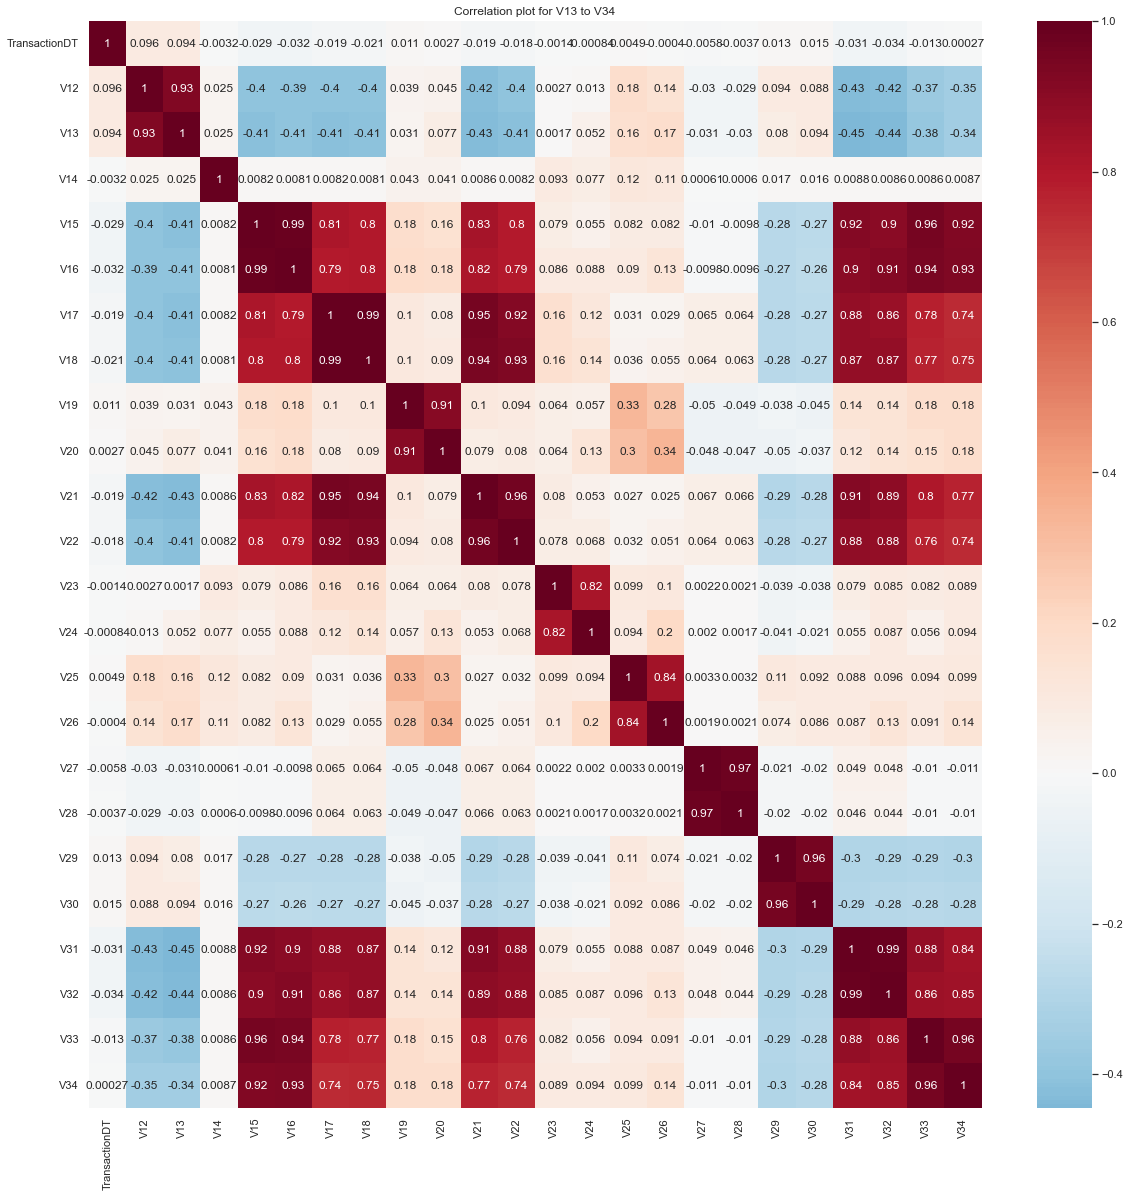

[['V13', 'V12'], ['V16', 'V15', 'V17', 'V18', 'V21', 'V22', 'V31', 'V32', 'V33', 'V34'], ['V20', 'V19'], ['V24', 'V23'], ['V26', 'V25'], ['V28', 'V27'], ['V30', 'V29'], ['V14']]
Use these columns  ['V13', 'V17', 'V20', 'V24', 'V26', 'V28', 'V30', 'V14']


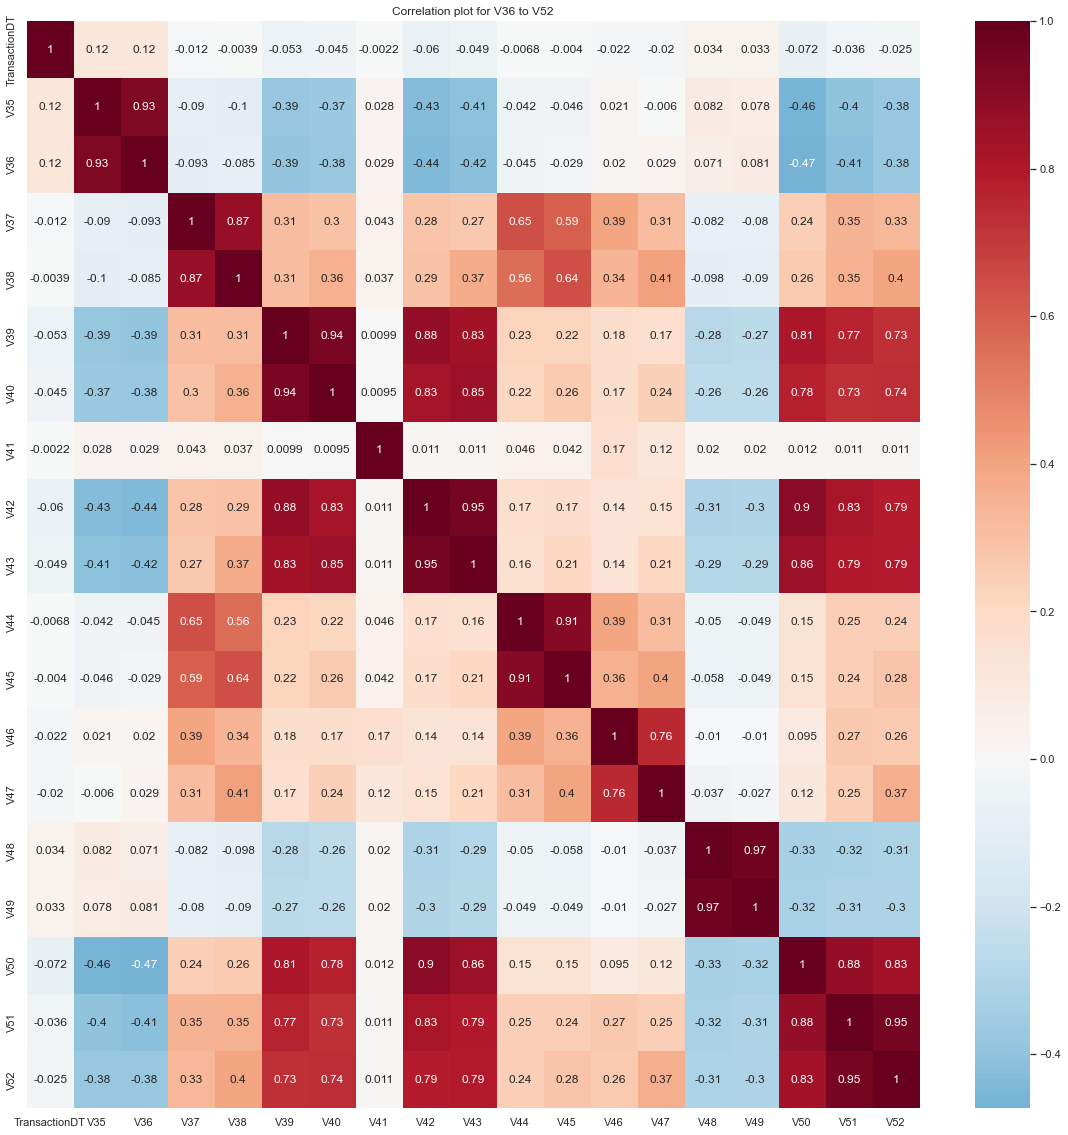

[['V36', 'V35'], ['V38', 'V37'], ['V40', 'V39', 'V42', 'V43', 'V50', 'V51', 'V52'], ['V45', 'V44'], ['V47', 'V46'], ['V49', 'V48'], ['V41']]
Use these columns  ['V36', 'V38', 'V40', 'V45', 'V47', 'V49', 'V41']


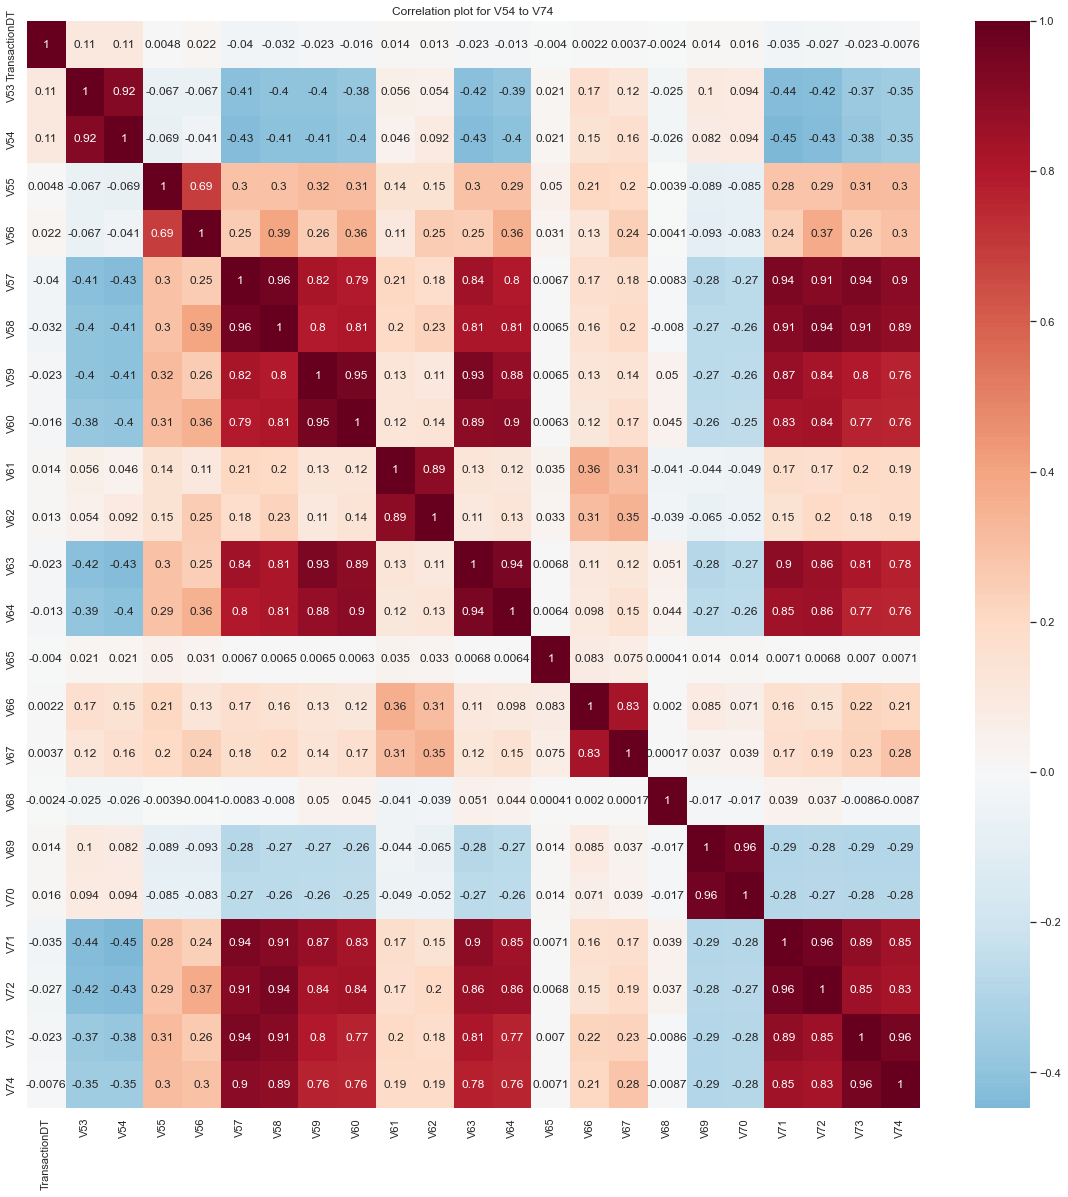

[['V54', 'V53'], ['V58', 'V57', 'V59', 'V60', 'V63', 'V64', 'V71', 'V72', 'V73', 'V74'], ['V62', 'V61'], ['V67', 'V66'], ['V70', 'V69'], ['V55'], ['V56'], ['V65'], ['V68']]
Use these columns  ['V54', 'V59', 'V62', 'V67', 'V70', 'V55', 'V56', 'V65', 'V68']


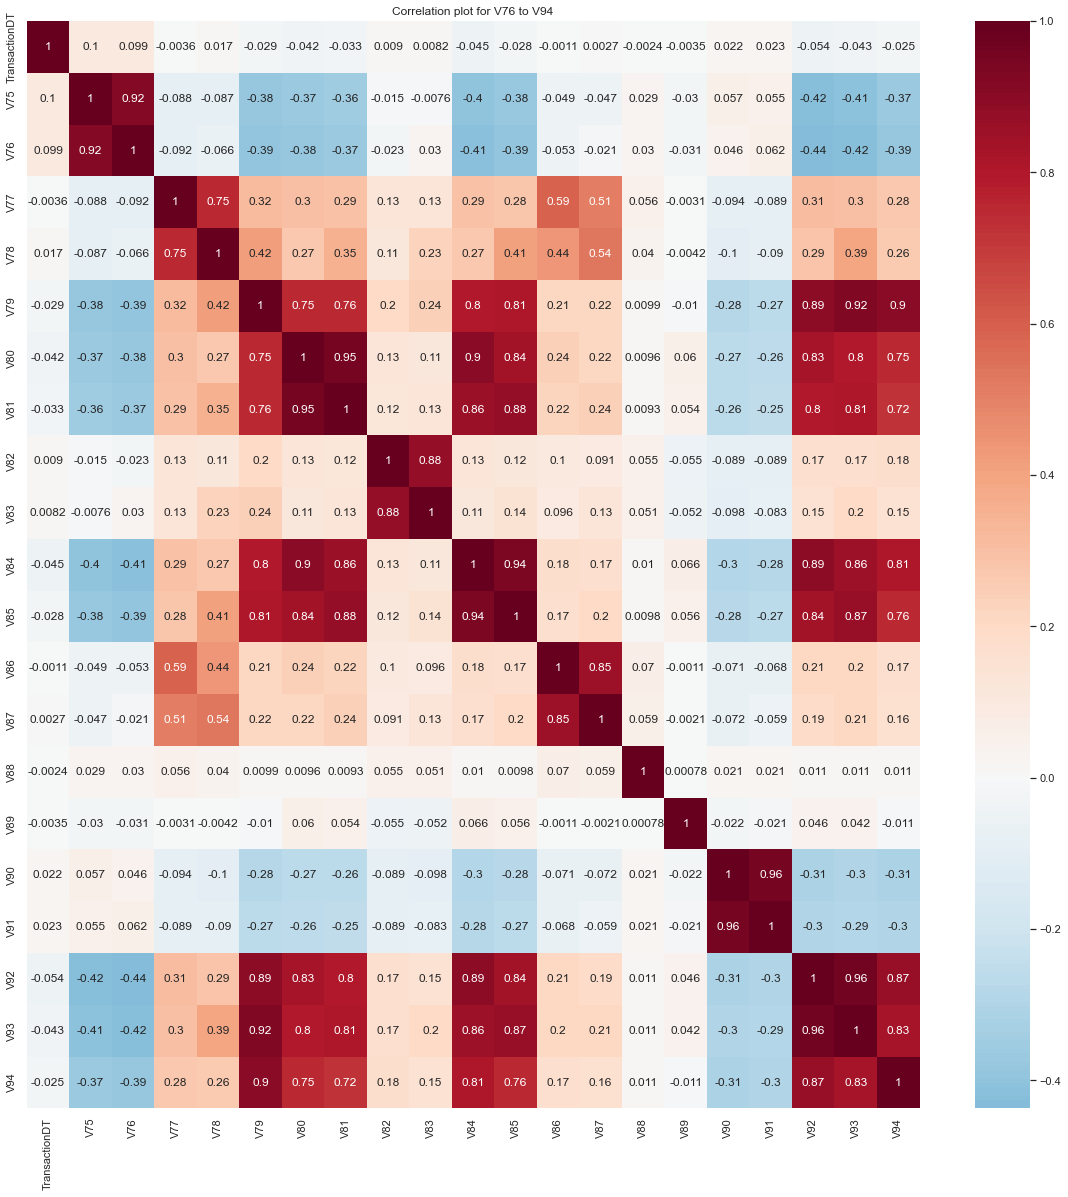

[['V76', 'V75'], ['V78', 'V77'], ['V81', 'V79', 'V80', 'V84', 'V85', 'V92', 'V93', 'V94'], ['V83', 'V82'], ['V87', 'V86'], ['V91', 'V90'], ['V88'], ['V89']]
Use these columns  ['V76', 'V78', 'V81', 'V83', 'V87', 'V91', 'V88', 'V89']


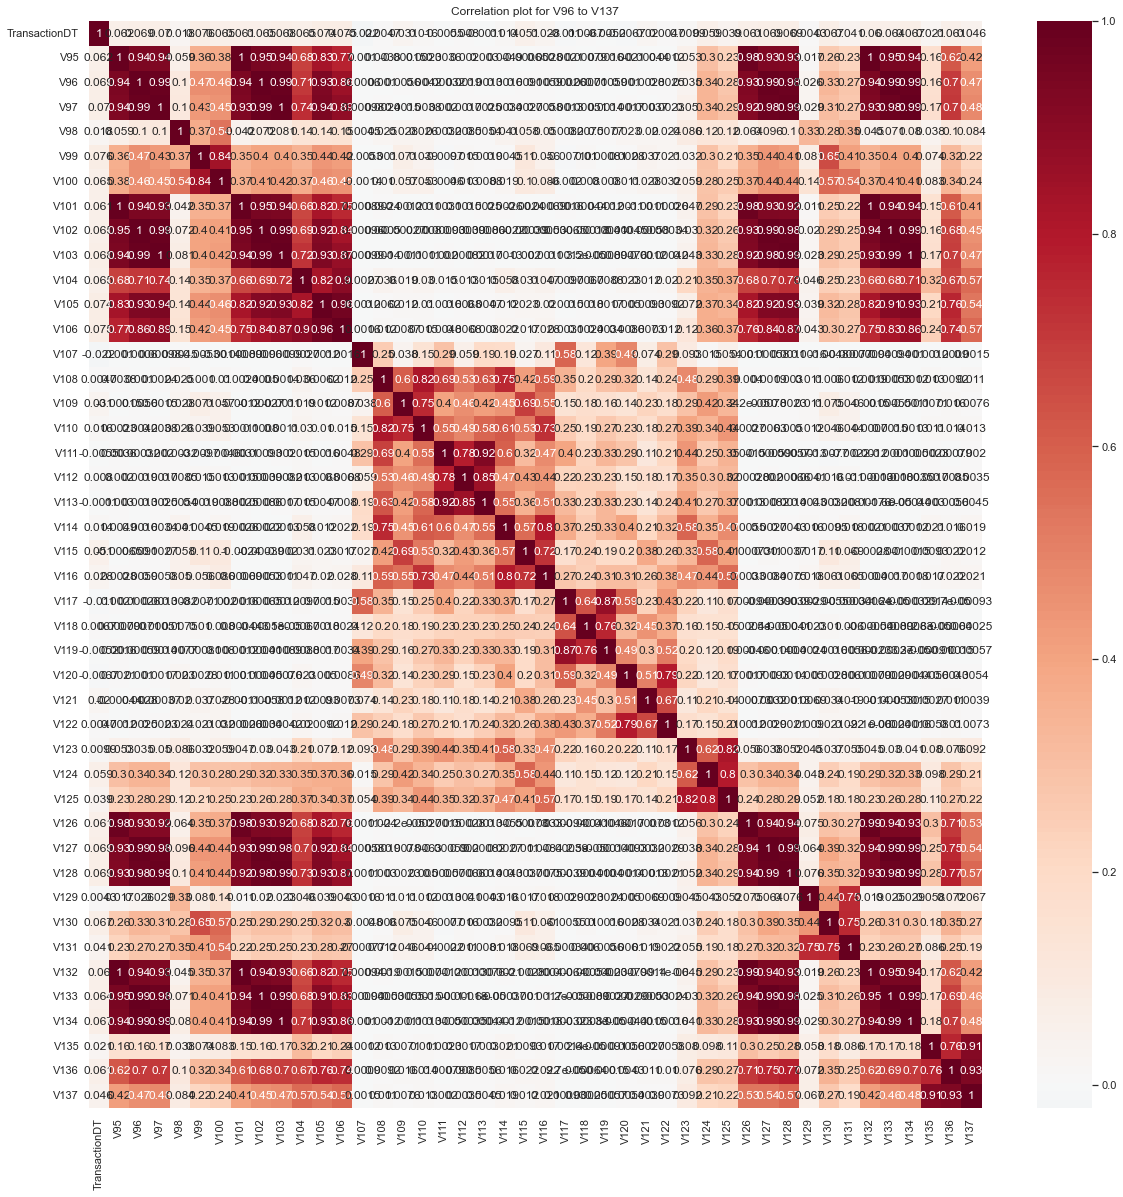

[['V96', 'V95', 'V97', 'V101', 'V102', 'V103', 'V105', 'V104', 'V106', 'V126', 'V127', 'V128', 'V132', 'V133', 'V134', 'V136', 'V135', 'V137'], ['V100', 'V99'], ['V110', 'V108'], ['V112', 'V111', 'V113'], ['V116', 'V114'], ['V119', 'V117', 'V118'], ['V122', 'V120'], ['V125', 'V123', 'V124'], ['V98'], ['V107'], ['V109'], ['V115'], ['V121'], ['V129'], ['V130'], ['V131']]
Use these columns  ['V127', 'V99', 'V110', 'V112', 'V116', 'V119', 'V122', 'V125', 'V98', 'V107', 'V109', 'V115', 'V121', 'V129', 'V130', 'V131']


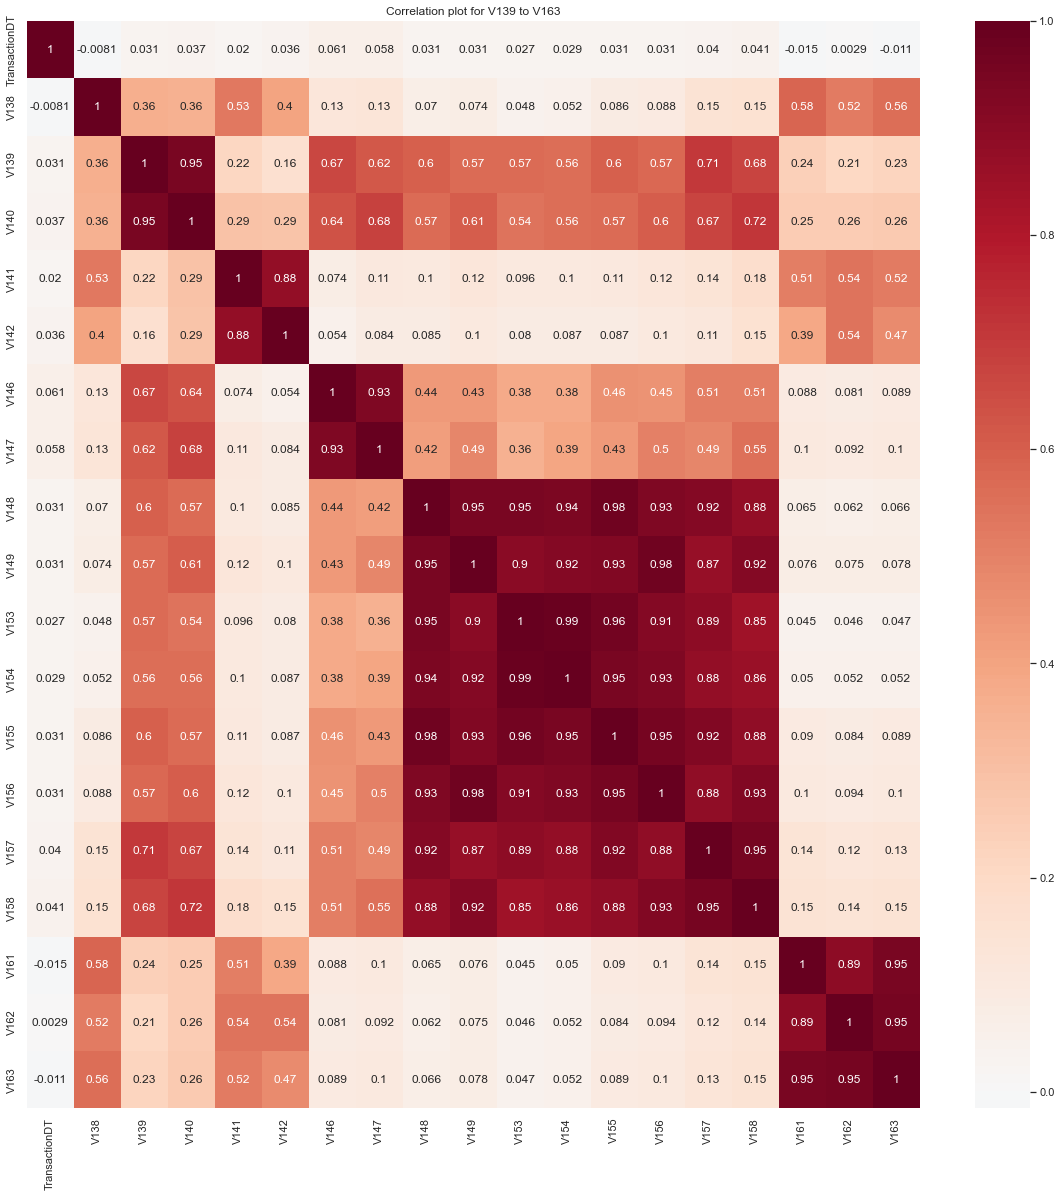

[['V140', 'V139'], ['V142', 'V141'], ['V147', 'V146'], ['V149', 'V148', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158'], ['V162', 'V161', 'V163'], ['V138']]
Use these columns  ['V140', 'V142', 'V147', 'V155', 'V162', 'V138']


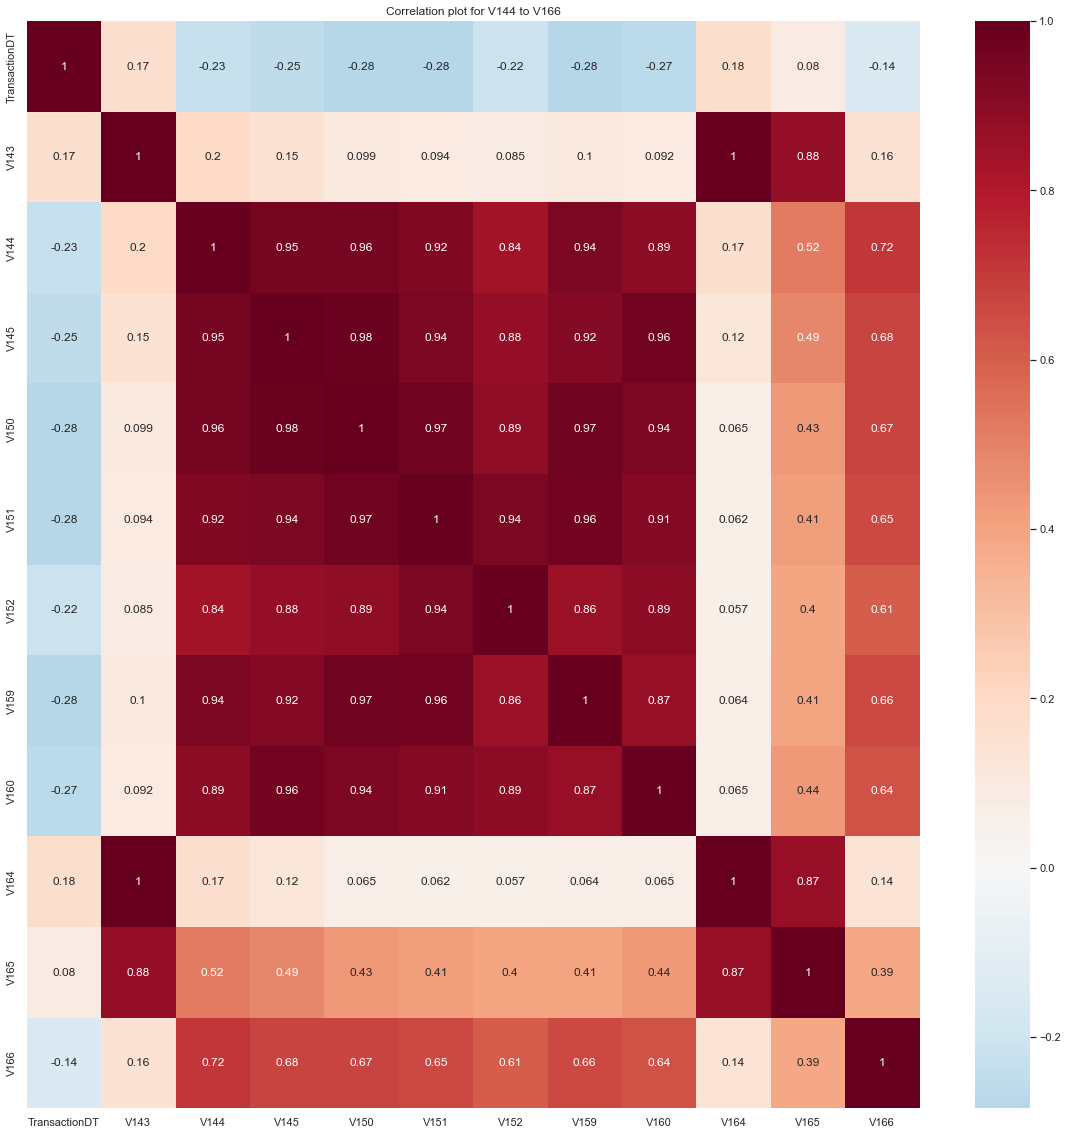

[['V145', 'V144', 'V150', 'V151', 'V152', 'V159', 'V160'], ['V164', 'V143', 'V165'], ['V166']]
Use these columns  ['V160', 'V165', 'V166']


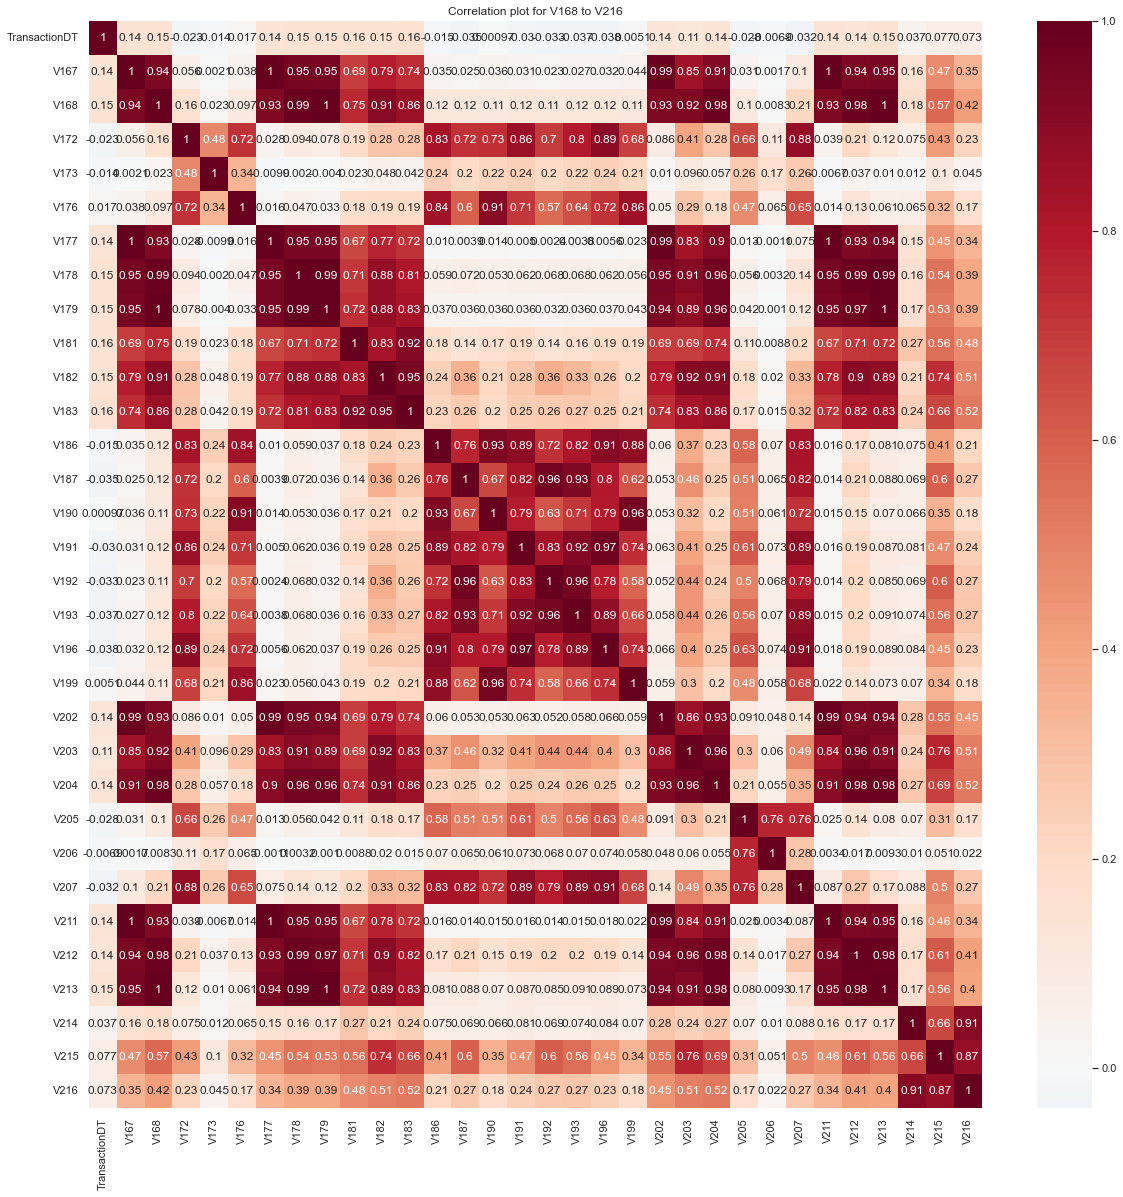

[['V168', 'V167', 'V177', 'V178', 'V179', 'V182', 'V181', 'V183', 'V202', 'V203', 'V204', 'V211', 'V212', 'V213', 'V215', 'V216'], ['V186', 'V172', 'V176', 'V187', 'V190', 'V191', 'V192', 'V193', 'V196', 'V199', 'V207', 'V205'], ['V206', 'V205'], ['V216', 'V214'], ['V173']]
Use these columns  ['V203', 'V207', 'V205', 'V216', 'V173']


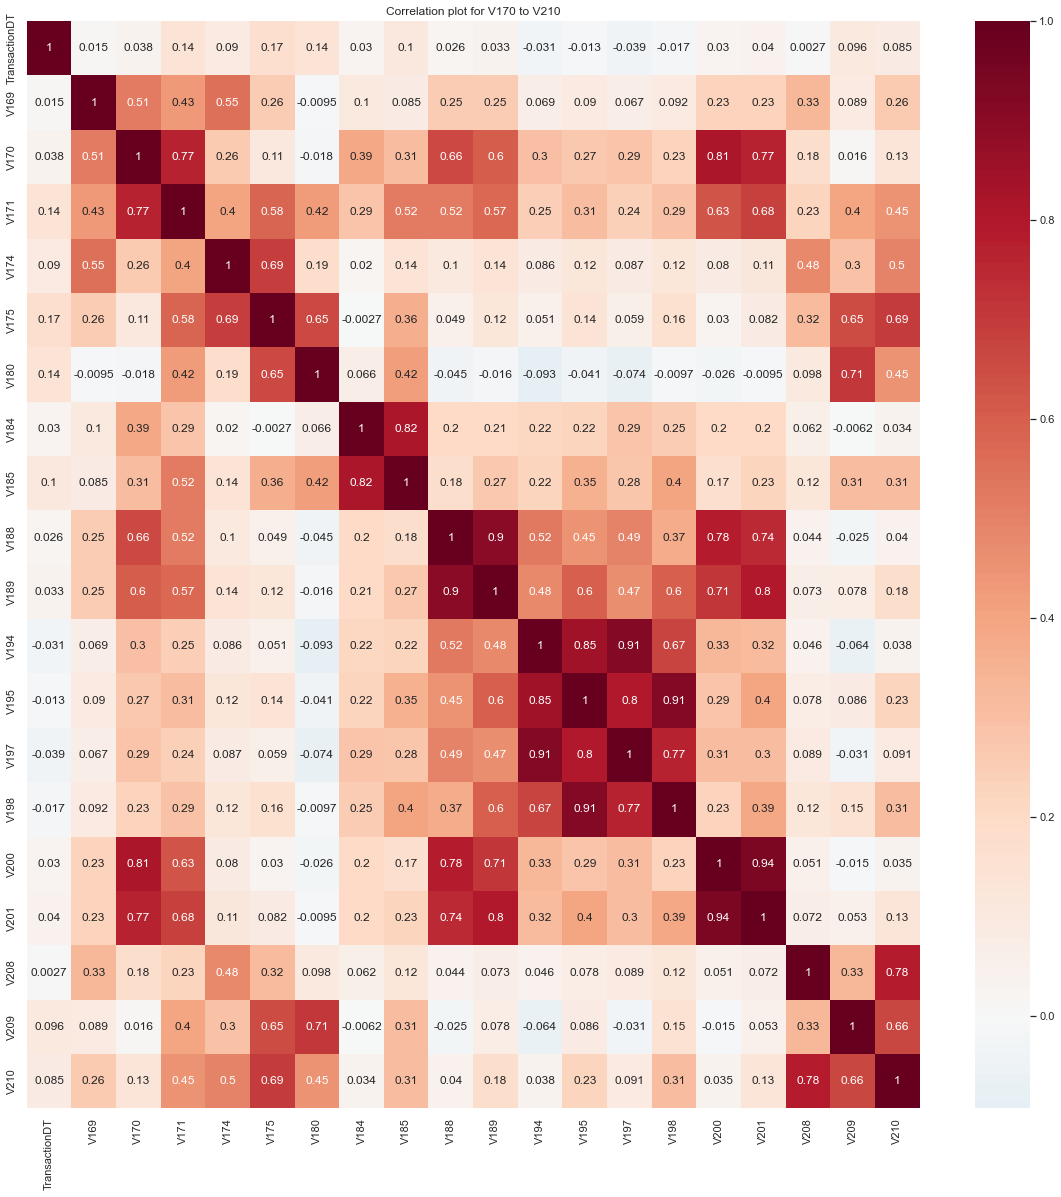

[['V171', 'V170', 'V200', 'V188', 'V201', 'V189'], ['V185', 'V184'], ['V189', 'V188'], ['V195', 'V194', 'V197', 'V198'], ['V210', 'V208'], ['V169'], ['V174'], ['V175'], ['V180'], ['V209']]
Use these columns  ['V171', 'V185', 'V189', 'V198', 'V210', 'V169', 'V174', 'V175', 'V180', 'V209']


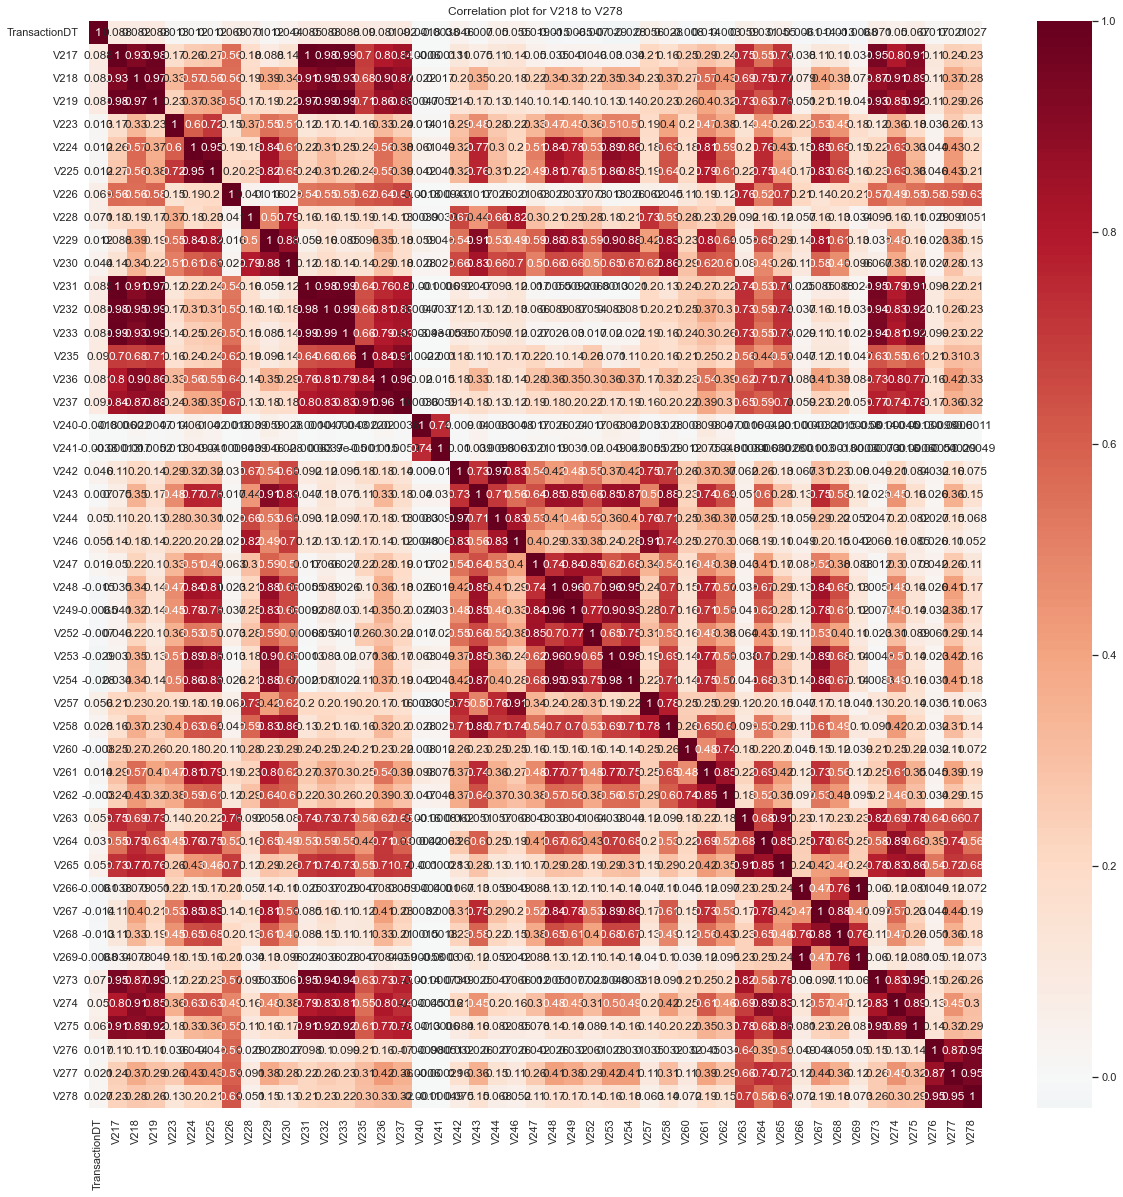

[['V218', 'V217', 'V219', 'V231', 'V232', 'V233', 'V236', 'V235', 'V237', 'V265', 'V263', 'V264', 'V267', 'V268', 'V269', 'V273', 'V274', 'V275'], ['V225', 'V224', 'V229', 'V230', 'V243', 'V248', 'V249', 'V247', 'V252', 'V253', 'V254', 'V258', 'V257', 'V261', 'V262', 'V264', 'V267'], ['V230', 'V228', 'V246', 'V242', 'V244', 'V257'], ['V244', 'V242'], ['V263', 'V226'], ['V268', 'V266', 'V269'], ['V277', 'V276', 'V278'], ['V223'], ['V240'], ['V241'], ['V260']]
Use these columns  ['V264', 'V264', 'V230', 'V244', 'V263', 'V268', 'V277', 'V223', 'V240', 'V241', 'V260']


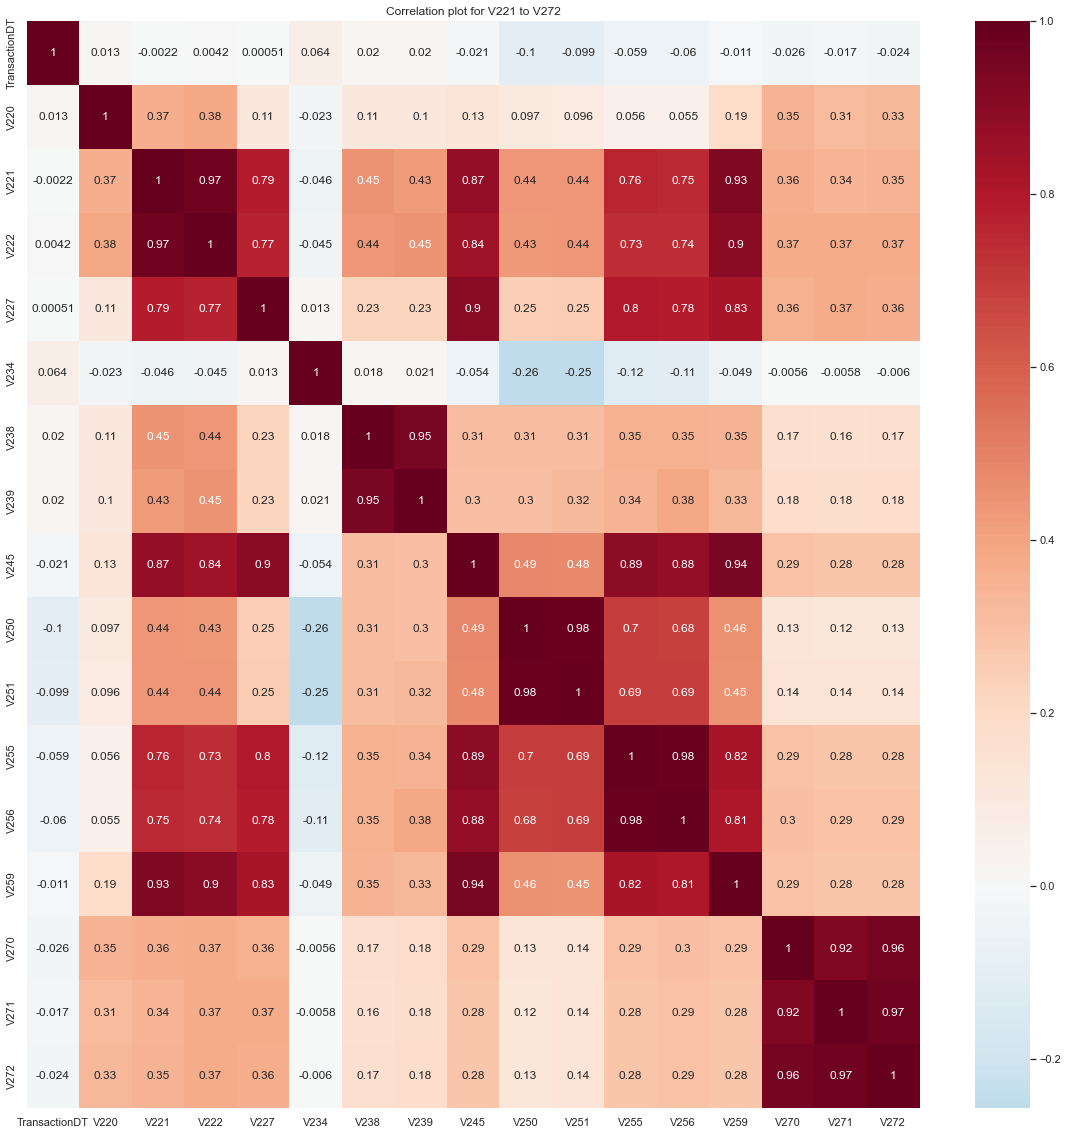

[['V222', 'V221', 'V227', 'V245', 'V255', 'V256', 'V259'], ['V239', 'V238'], ['V251', 'V250'], ['V271', 'V270', 'V272'], ['V220'], ['V234']]
Use these columns  ['V221', 'V239', 'V251', 'V271', 'V220', 'V234']


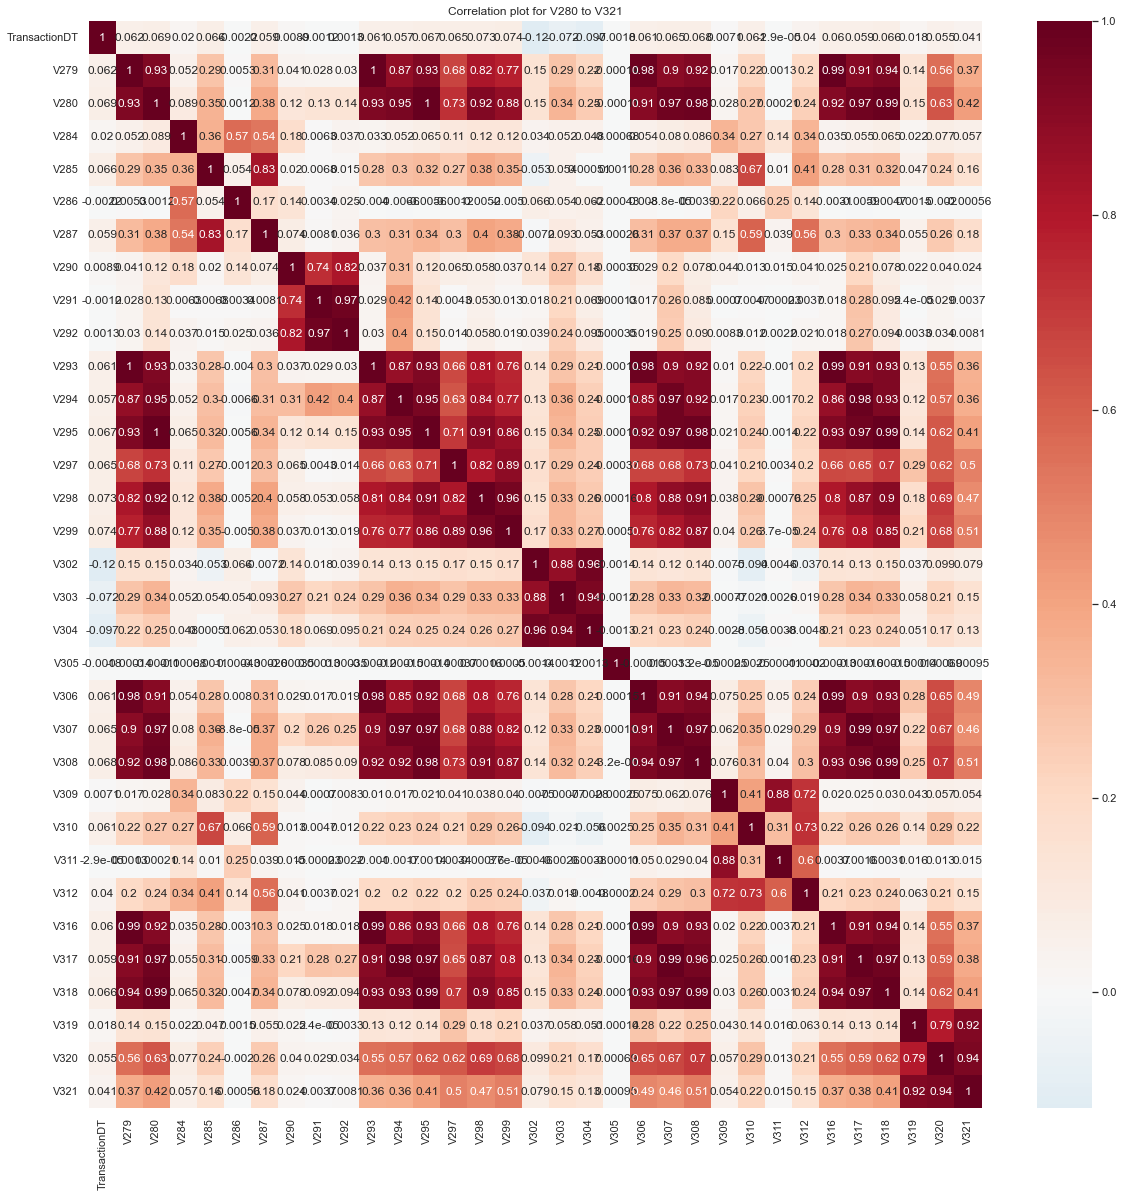

[['V280', 'V279', 'V293', 'V294', 'V295', 'V298', 'V297', 'V299', 'V306', 'V307', 'V308', 'V316', 'V317', 'V318'], ['V287', 'V285'], ['V292', 'V290', 'V291'], ['V303', 'V302', 'V304'], ['V311', 'V309'], ['V320', 'V319', 'V321'], ['V284'], ['V286'], ['V305'], ['V310'], ['V312']]
Use these columns  ['V307', 'V285', 'V291', 'V303', 'V309', 'V320', 'V284', 'V286', 'V305', 'V310', 'V312']


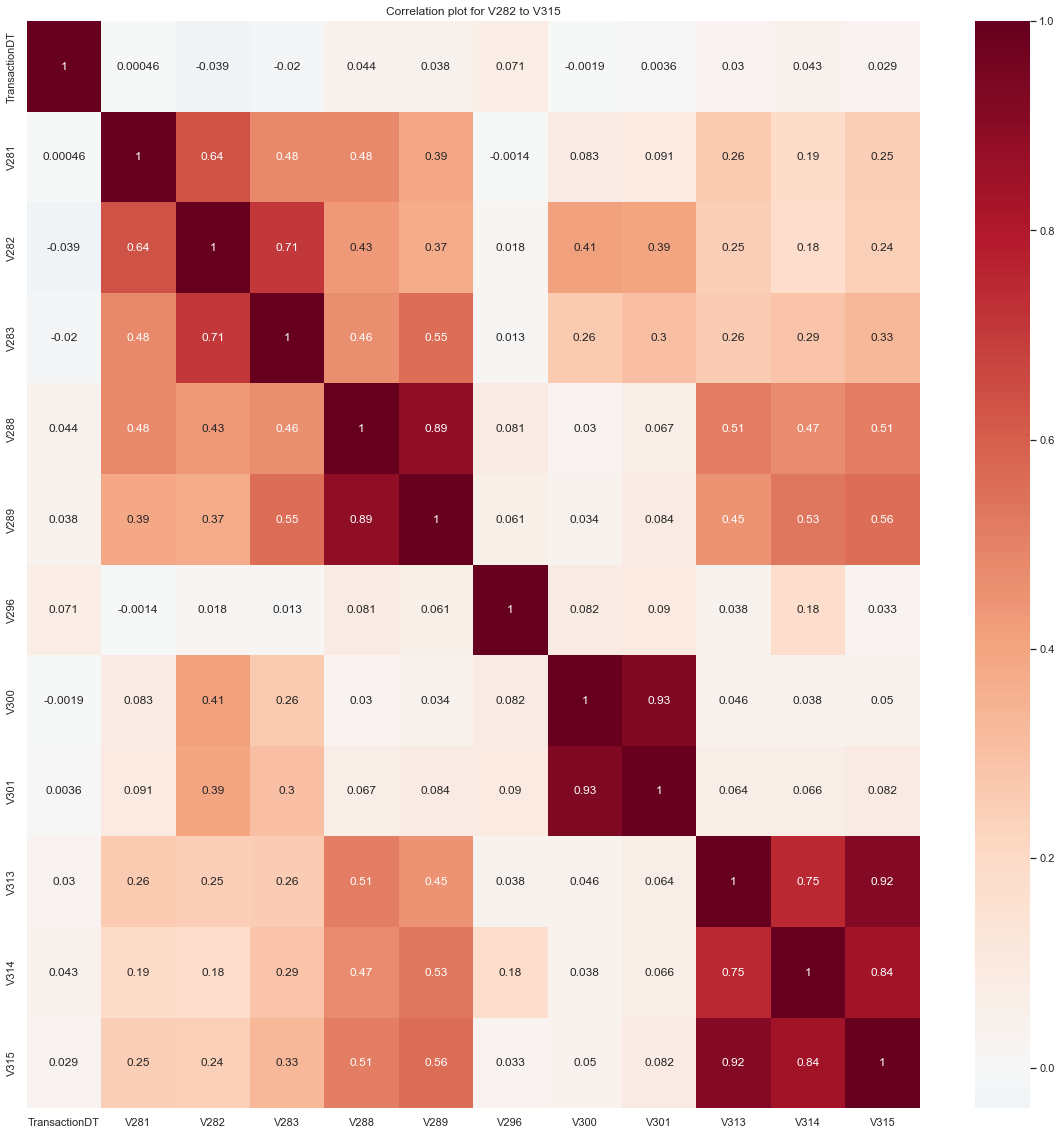

[['V289', 'V288'], ['V301', 'V300'], ['V315', 'V313', 'V314'], ['V281'], ['V282'], ['V283'], ['V296']]
Use these columns  ['V289', 'V301', 'V314', 'V281', 'V282', 'V283', 'V296']


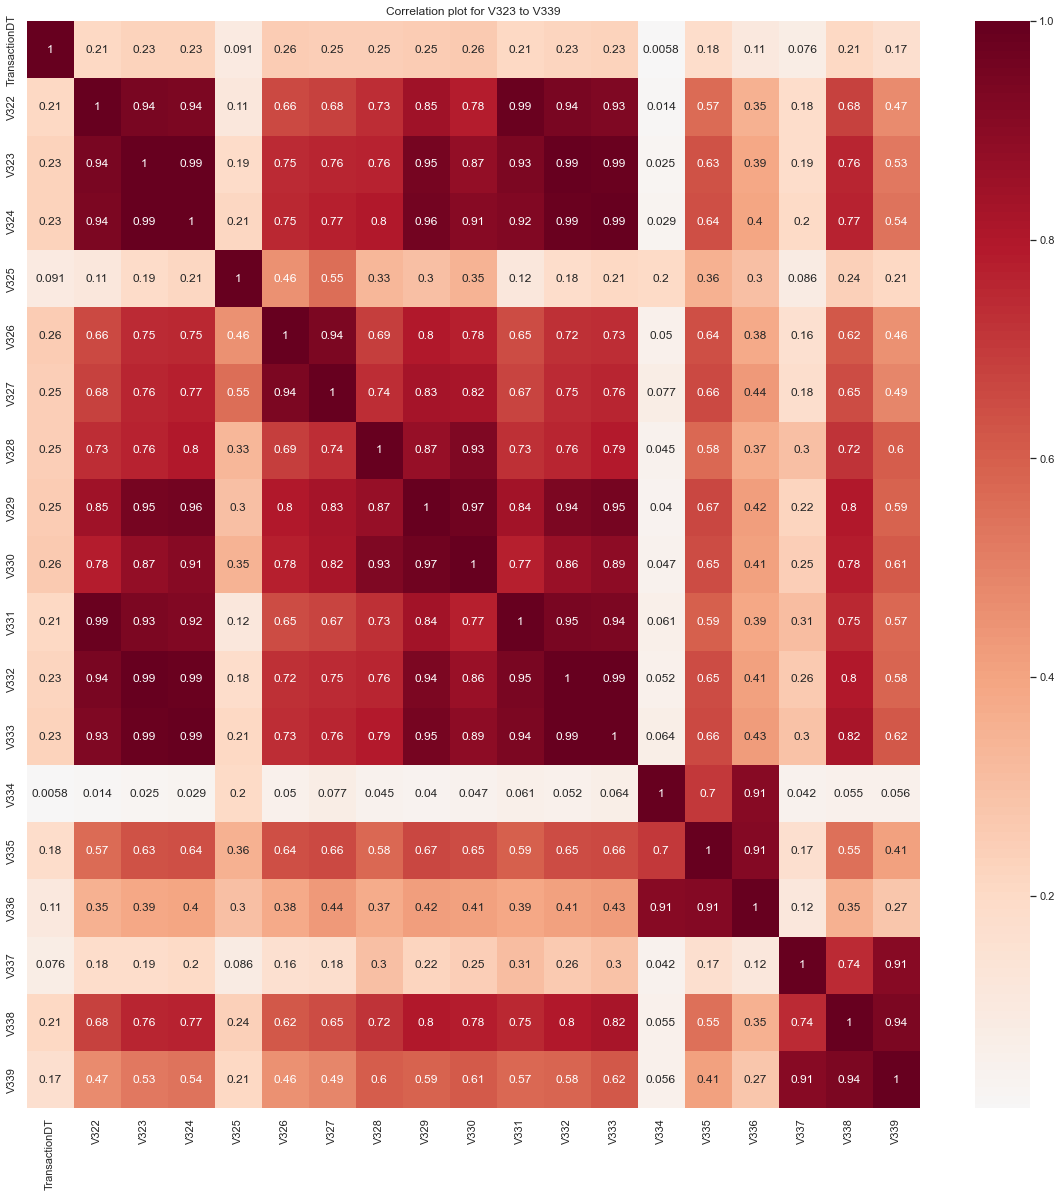

[['V323', 'V322', 'V324', 'V327', 'V326', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V338', 'V339'], ['V336', 'V334', 'V335'], ['V339', 'V337'], ['V325']]
Use these columns  ['V332', 'V335', 'V339', 'V325']


In [30]:
# There are so many groups, we need to do this programatically to find our correaltion plots
# We will also group ouyr columns with correlations greater than 0.75

# Function get_corr_groups
# Input: the number of na values for a group, to index from our v columns grouped by number of na valeus
# Output: A nested list of the columns, nested by correlation (a nested list represents a set of columns correlated to each other)
def get_corr_groups(num_na_index):
    # Find the upper trinagular matrix (this removes duplicate pairs)
    corr_matrix = train[null_group[num_na_index]].corr()
    corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=0).astype(bool))
    grps = []
    
    # Iterate along our columns
    for i in range(len(corr_matrix.columns) - 1):
        w_switch = True
      #  print("--- Outer loop for col " + str(i) + "  ---")
        # Iterate along columns
        while w_switch:
            for j in range(i+1):   
                # Get the correlation coefficent for the value we are looking at
                x = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
                val = x.values
                col = x.columns.item()
                row = x.index.item()

               # print("- Inner loop for col" + col + "row " + row + " -")
                added = False
                # See if that value is significant
                if val >= 0.75:
                    # we have: col, row
           #         print("Significant: " + col + " , " + row)
               #     print("Groups Pre-Add: " + str(grps))
                    added = False
                    added_vals = set()
                    # See if our list is empty, if it is we need to initalise with the first pair
                    if not grps:
                    #    print("Ceating first nested list: " + col + " , " + row)
                        grps.append([col, row])
                        added_vals.add(col)
                        added_vals.add(row)
                        added = True                    
                    else:
                        # We iterate through each list in our list, checking to see if the column is in the list
                        # and then adding the row if it is not already in the list
                        for n_list in grps:
                            if not added:
                            #    print("Looking at nested list: " + str(n_list))
                                if col in n_list:
                                 #   print("Column " + col + " is in our nest list " + str(n_list))
                                    if row not in n_list:
                           #             print("Row " + row + " is not in our nest list " + str(n_list))
                                        if row not in added_vals:
                                            n_list.append(row)
                                        added_vals.add(row)
                               #         print("Added to n_list: " + row)
                                        added = True
                                    else:
                                        added = True
                                   #     print("Already in nested list!! both col and row")
                                # We are now doing the same, but searching to see if the row is in the list
                                # and adding the column if it is
                                elif row in n_list:
                                   # print("Row " + row + " is in our nest list " + str(n_list))
                                    if col not in n_list:
                                    #    print("col " + col + " is not in our nest list " + str(n_list))
                                        if col not in added_vals:
                                            n_list.append(col)
                                        added_vals.add(col)
                                      #  print("Added to n_list: " + col)
                                        added = True
                                    else:
                                        added = True
                                  #      print("Already in nested list!! both col and row")
                        if not added:
                            # If it didn't get added to an existing nested list, we create a new nested list
                           # print("Not added so creating new group: " + col + " , " + row)
                            if col not in added_vals:
                                if row not in added_vals:
                                    grps.append([col, row])
                            added_vals.add(col)
                            added_vals.add(row)
                            w_switch = False  
                            added = True
                if j == (i):
                    w_switch = False
    # Now need to check for lonely columns = they get put in a new list by themselves
    for i in null_group[num_na_index]:
        if not any(i in nest_list for nest_list in grps):
            grps.append([i])
    
    return grps

# Function to reduce each list within the list to one value
# We decide what value we reduce to based on the number of unique values that column has
# Input: Nested list of V columns, grouped by correlation
# Output: List of V columns
def reduce_groups(groups):
    use = []
    for g in groups:
        mx=0; vx=g[0] #[1]
        for gg in g:
            n = train[str(gg)].nunique() 
            if n>mx:
                mx=n
                vx=gg
        use.append(vx)
    print('Use these columns ',use)
    return use
    
# A function that creates a correlation plot for a given list of v colums
# Input: list of v columns
# Output: correlation plot
def corr_plots(Vs):
    cols = ['TransactionDT'] + Vs
    plt.figure(figsize=(20,20))
    sns.heatmap(train[cols].corr(), annot=True, center=0, cmap='RdBu_r')
    plt.title("Correlation plot for " + Vs[1] + " to " + Vs[-1])
    plt.show()

# Iterate through each group of na columns, producing a correlation plot and a reduced list of v columns to keep
v_cols = []
for i in null_group:
    if i !=0 and (len(null_group[i]) > 5):
        corr_plots(null_group[i])
        print(get_corr_groups(i))
        v_cols.append(reduce_groups(get_corr_groups(i)))

In [31]:
# ID colums
# Let's iterate through them and see their unique values as most are categorical values
ids = ['id_0'+str(x) for x in range(1,10)]+['id_'+str(x) for x in range(10,39)]
for c in ids: 
    #print out the unique rows of each id__ column
    print (c,df[c].unique()[:10])

id_01 [ nan   0.  -5. -15. -10. -20. -40. -30. -25. -55.]
id_02 [    nan  70787.  98945. 191631. 221832.   7460.  61141.  31964. 116098.
 257037.]
id_03 [nan  0.  3.  2.  5.  1.  6.  9.  4. -5.]
id_04 [ nan   0. -11.  -5.  -8.  -1.  -6.  -9.  -3. -13.]
id_05 [nan  0.  1.  3.  2.  9. 12.  6.  4. 21.]
id_06 [ nan  -5.   0.  -6. -10. -11.  -1.  -4. -43.  -9.]
id_07 [nan 22.  6. -1.  4.  2. 17. 12. 27.  5.]
id_08 [  nan  -34.  -55. -100.  -15.  -33.  -13.  -36.  -44.  -26.]
id_09 [nan  0.  3.  2.  1.  5. -8.  7.  4.  6.]
id_10 [ nan   0.  -9. -42.  -6. -29.  -8.  -1.  -5. -11.]
id_11 [   nan 100.    93.75  95.06  95.6   94.3   96.2   90.56  97.56  96.44]
id_12 [NaN, 'NotFound', 'Found']
Categories (2, object): ['Found', 'NotFound']
id_13 [nan 49. 52. 14. 20. 55. 43. 18. 41. 63.]
id_14 [  nan -480. -300. -360. -420. -540. -600.  480. -240.  300.]
id_15 [NaN, 'New', 'Found', 'Unknown']
Categories (3, object): ['Found', 'New', 'Unknown']
id_16 [NaN, 'NotFound', 'Found']
Categories (2, object)